## 1. Load data

In [31]:
import pandas as pd

df1 = pd.read_csv(r'C:\Users\james\OneDrive\Desktop\ISAAC Performance Forecasting\MMUSIC x ISAAC (Spotify data) - Historical data.csv', sep=',')
df2 = pd.read_csv(r'C:\Users\james\OneDrive\Desktop\ISAAC Performance Forecasting\MMUSIC x ISAAC (YouTube data) - Historical data.csv', sep=',')
df3 = pd.read_csv(r'C:\Users\james\OneDrive\Desktop\ISAAC Performance Forecasting\ISAAC (Performance data) - Historical data.csv', sep=',')

## 2. Exploratory Data Analysis

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Song                     47 non-null     object 
 1   Published Date           47 non-null     object 
 2   Spotify Total Streams    47 non-null     object 
 3   Before 2017-09-09        47 non-null     int64  
 4   2017-09-09 - 2018-09-09  47 non-null     int64  
 5   2018-09-09 - 2019-09-09  47 non-null     int64  
 6   2019-09-09 - 2020-09-09  47 non-null     int64  
 7   2020-09-09 - 2021-09-09  47 non-null     float64
 8   2021-09-09 - 2022-09-09  47 non-null     object 
 9   2022-09-09 - 2023-09-09  47 non-null     float64
 10  2023-09-09 - 2024-09-09  47 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 4.2+ KB


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Song                     41 non-null     object 
 1   Published Date           41 non-null     object 
 2   YouTube Views            41 non-null     object 
 3   Before 2015-09-09        41 non-null     float64
 4   2015-09-09 - 2016-09-09  41 non-null     float64
 5   2016-09-09 - 2017-09-09  41 non-null     object 
 6   2017-09-09 - 2018-09-09  41 non-null     object 
 7   2018-09-09 - 2019-09-09  41 non-null     object 
 8   2019-09-09 - 2020-09-09  41 non-null     object 
 9   2020-09-09 - 2021-09-09  41 non-null     object 
 10  2021-09-09 - 2022-09-09  41 non-null     object 
 11  2022-09-09 - 2023-09-09  40 non-null     object 
 12  2023-09-09 - 2024-09-09  41 non-null     float64
dtypes: float64(3), object(10)
memory usage: 4.3+ KB


In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3 non-null      object 
 1   2017        3 non-null      float64
 2   2018        3 non-null      float64
 3   2019        3 non-null      float64
 4   2020        3 non-null      float64
 5   2021        3 non-null      float64
 6   2022        3 non-null      float64
 7   2023        3 non-null      float64
 8   2024        3 non-null      float64
dtypes: float64(8), object(1)
memory usage: 348.0+ bytes


In [35]:
df1.describe()

,Before 2017-09-09,2017-09-09 - 2018-09-09,2018-09-09 - 2019-09-09,2019-09-09 - 2020-09-09,2020-09-09 - 2021-09-09,2022-09-09 - 2023-09-09
count,47.0,47.0,47.0,47.0,47.000000,47.000000
mean,0.0,0.0,0.0,0.0,1.502787,35.637234
std,0.0,0.0,0.0,0.0,10.302590,88.779825
min,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.000000,16.471000
max,0.0,0.0,0.0,0.0,70.631000,492.967000


In [36]:
df2.describe()

,Before 2015-09-09,2015-09-09 - 2016-09-09,2023-09-09 - 2024-09-09
count,41.000000,41.000000,41.000000
mean,25.013902,21.780122,55.284341
std,133.589711,118.040848,150.216143
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,7.524000
75%,0.000000,0.000000,44.799000
max,847.964000,750.067000,838.925000


### 2.1 Data Transformation

In [37]:
 # Convert 'object' to 'float64' in df1
columns_to_convert = ['2021-09-09 - 2022-09-09', '2023-09-09 - 2024-09-09', 'Spotify Total Streams']
# Remove the thousands separator ('.') and convert to float
df1[columns_to_convert] = df1[columns_to_convert].apply(lambda x: x.str.replace('.', '', regex=False).astype(float))

print(df1.dtypes)  # Check the new data type


Song                        object
Published Date              object
Spotify Total Streams      float64
Before 2017-09-09            int64
2017-09-09 - 2018-09-09      int64
2018-09-09 - 2019-09-09      int64
2019-09-09 - 2020-09-09      int64
2020-09-09 - 2021-09-09    float64
2021-09-09 - 2022-09-09    float64
2022-09-09 - 2023-09-09    float64
2023-09-09 - 2024-09-09    float64
dtype: object


In [38]:
 # Convert 'object' to 'float64' in df2
columns_to_convert = ['YouTube Views', '2016-09-09 - 2017-09-09', '2017-09-09 - 2018-09-09', '2018-09-09 - 2019-09-09', '2019-09-09 - 2020-09-09', '2020-09-09 - 2021-09-09', 
                      '2021-09-09 - 2022-09-09', '2022-09-09 - 2023-09-09']

# Remove the thousands separator ('.') and convert to float
df2[columns_to_convert] = df2[columns_to_convert].apply(lambda x: x.str.replace('.', '', regex=False).astype(float))

print(df2.dtypes)  # Check the new data type

Song                        object
Published Date              object
YouTube Views              float64
Before 2015-09-09          float64
2015-09-09 - 2016-09-09    float64
2016-09-09 - 2017-09-09    float64
2017-09-09 - 2018-09-09    float64
2018-09-09 - 2019-09-09    float64
2019-09-09 - 2020-09-09    float64
2020-09-09 - 2021-09-09    float64
2021-09-09 - 2022-09-09    float64
2022-09-09 - 2023-09-09    float64
2023-09-09 - 2024-09-09    float64
dtype: object


In [39]:
# Convert Published Date to datetime
df1['Published Date'] = pd.to_datetime(df1['Published Date'], format='%Y-%m-%d', errors='coerce')
df2['Published Date'] = pd.to_datetime(df1['Published Date'], format='%Y-%m-%d', errors='coerce')

In [40]:
# Aggregate the Spotify data by year and prepare it for time series modeling
# Reshape the data so we can work with time series more easily
# Identify all columns that represent stream data based on the date format in the column names
stream_columns = [col for col in df1.columns if ' - ' in col]
melted_data = pd.melt(df1, id_vars=['Song', 'Published Date'], value_vars=stream_columns, 
                      var_name='Date Range', value_name='Streams')

# Extract the start date from the 'Date Range' column (which contains ranges like '2016-09-09 - 2017-09-09')
melted_data['Start Date'] = melted_data['Date Range'].str.split(' - ').str[0]

# Extract the year from the 'Year' column
melted_data['Year'] = melted_data['Start Date'].str.extract(r'(\d{4})').astype(int)

# Group by 'Year' and 'Published Date' to aggregate streams
aggregated_df1 = melted_data.groupby(['Year', 'Song', 'Published Date']).sum().reset_index()

# Sort by 'Published Date'
aggregated_df1 = aggregated_df1.sort_values(by='Published Date')
print(aggregated_df1.head(10))


     Year                 Song Published Date               Date Range  \
164  2020            Mr. Right     2017-01-18  2020-09-09 - 2021-09-09   
211  2021            Mr. Right     2017-01-18  2021-09-09 - 2022-09-09   
59   2018             Get Down     2017-01-18  2018-09-09 - 2019-09-09   
181  2020  Yêu Không Nghỉ Phép     2017-01-18  2020-09-09 - 2021-09-09   
228  2021  Yêu Không Nghỉ Phép     2017-01-18  2021-09-09 - 2022-09-09   
70   2018            Mr. Right     2017-01-18  2018-09-09 - 2019-09-09   
40   2017  Yêu Không Nghỉ Phép     2017-01-18  2017-09-09 - 2018-09-09   
247  2022             Get Down     2017-01-18  2022-09-09 - 2023-09-09   
258  2022            Mr. Right     2017-01-18  2022-09-09 - 2023-09-09   
153  2020             Get Down     2017-01-18  2020-09-09 - 2021-09-09   

     Streams  Start Date  
164      0.0  2020-09-09  
211   2146.0  2021-09-09  
59       0.0  2018-09-09  
181      0.0  2020-09-09  
228      0.0  2021-09-09  
70       0.0  2018-09-0

In [41]:
# Aggregate the YouTube data by year and prepare it for time series modeling
# Reshape the data so we can work with time series more easily
# Identify all columns that represent stream data based on the date format in the column names
stream_columns = [col for col in df1.columns if ' - ' in col]
melted_data = pd.melt(df2, id_vars=['Song', 'Published Date'], value_vars=stream_columns, 
                      var_name='Date Range', value_name='Streams')

# Extract the start date from the 'Date Range' column (which contains ranges like '2016-09-09 - 2017-09-09')
melted_data['Start Date'] = melted_data['Date Range'].str.split(' - ').str[0]

# Extract the year from the 'Year' column
melted_data['Year'] = melted_data['Start Date'].str.extract(r'(\d{4})').astype(int)

# Group by 'Year' and 'Published Date' to aggregate streams
aggregated_df2 = melted_data.groupby(['Year', 'Song', 'Published Date']).sum().reset_index()

# Sort by 'Published Date'
aggregated_df2 = aggregated_df2.sort_values(by='Published Date')
print(aggregated_df2.head(10))

     Year                 Song Published Date               Date Range  \
101  2019            Mr. Right     2017-01-18  2019-09-09 - 2020-09-09   
52   2018             Get Down     2017-01-18  2018-09-09 - 2019-09-09   
60   2018            Mr. Right     2017-01-18  2018-09-09 - 2019-09-09   
198  2021  Yêu Không Nghỉ Phép     2017-01-18  2021-09-09 - 2022-09-09   
175  2021             Get Down     2017-01-18  2021-09-09 - 2022-09-09   
216  2022             Get Down     2017-01-18  2022-09-09 - 2023-09-09   
224  2022            Mr. Right     2017-01-18  2022-09-09 - 2023-09-09   
157  2020  Yêu Không Nghỉ Phép     2017-01-18  2020-09-09 - 2021-09-09   
34   2017  Yêu Không Nghỉ Phép     2017-01-18  2017-09-09 - 2018-09-09   
75   2018  Yêu Không Nghỉ Phép     2017-01-18  2018-09-09 - 2019-09-09   

      Streams  Start Date  
101  199096.0  2019-09-09  
52   109377.0  2018-09-09  
60   218174.0  2018-09-09  
198       0.0  2021-09-09  
175   29285.0  2021-09-09  
216   17206.0  20

## 3. Plot the data

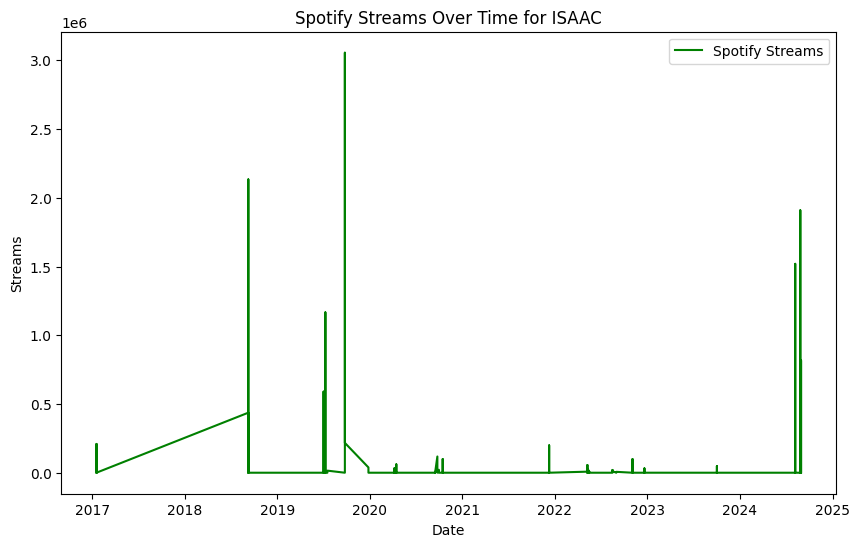

In [42]:
import matplotlib.pyplot as plt

# Plot the data to visualize trends
plt.figure(figsize=(10, 6))
plt.plot(aggregated_df1['Published Date'], aggregated_df1['Streams'], color='green', label='Spotify Streams')
plt.xlabel('Date')
plt.ylabel('Streams')
plt.title('Spotify Streams Over Time for ISAAC')
plt.legend()
plt.show()

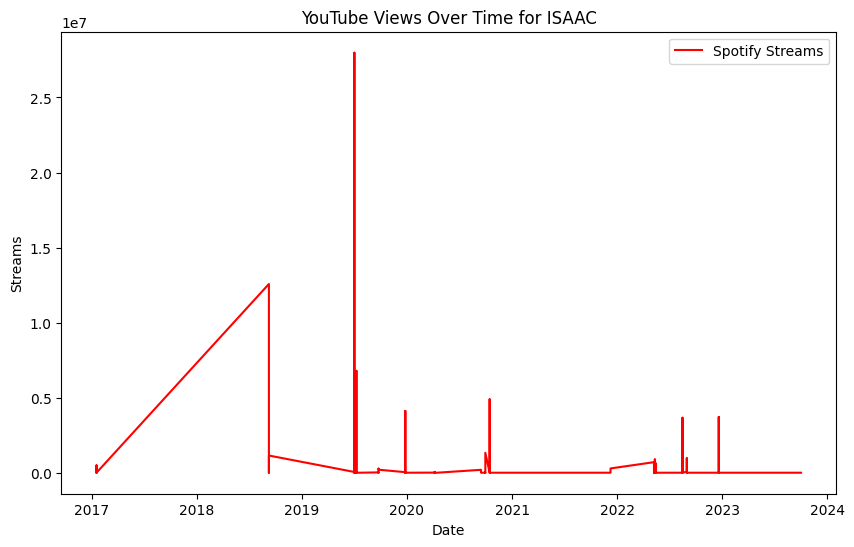

In [43]:
import matplotlib.pyplot as plt

# Plot the data to visualize trends
plt.figure(figsize=(10, 6))
plt.plot(aggregated_df2['Published Date'], aggregated_df2['Streams'], color='red', label='Spotify Streams')
plt.xlabel('Date')
plt.ylabel('Streams')
plt.title('YouTube Views Over Time for ISAAC')
plt.legend()
plt.show()


## 4. Build a Prophet Forecasting Model

In [44]:
! pip install prophet

  Using cached prophet-1.1.5-py3-none-win_amd64.whl.metadata (3.6 kB)
Using cached prophet-1.1.5-py3-none-win_amd64.whl (13.3 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\james\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\prophet\\stan_model\\cmdstan-2.33.1\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: C:\Users\james\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### 4.1 Forecasting Model for Spotify Performance

20:16:42 - cmdstanpy - INFO - Chain [1] start processing
20:16:42 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), 

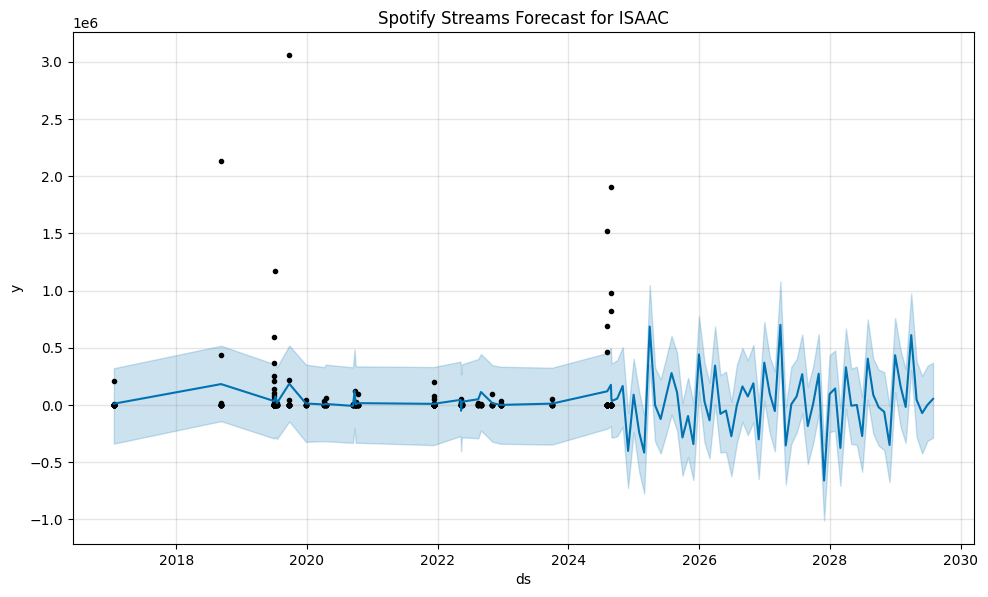

C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


KeyboardInterrupt: 

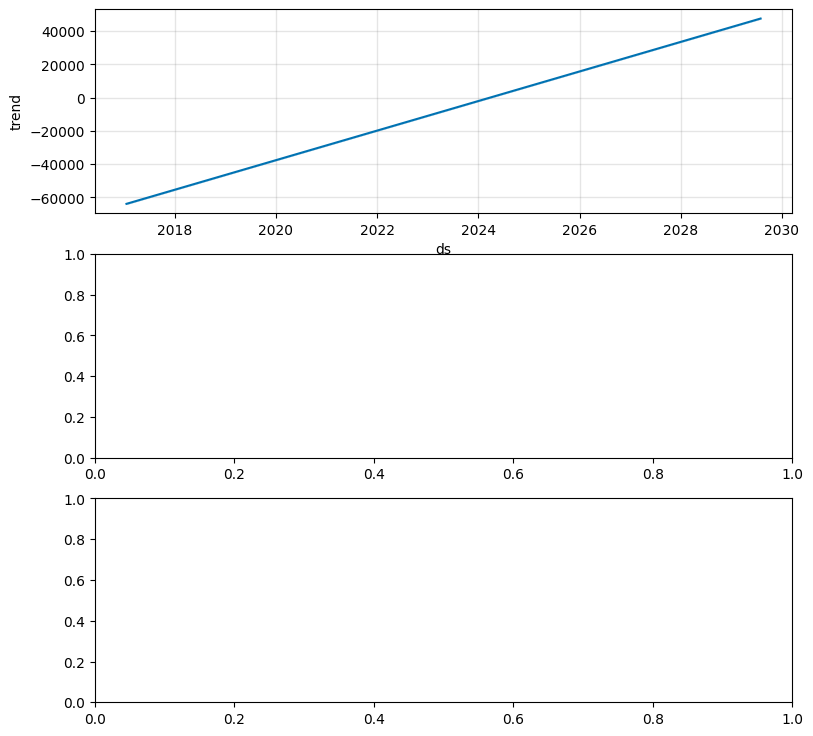

In [45]:
from prophet import Prophet
import matplotlib.pyplot

# Prepare data for Prophet
prophet_data = aggregated_df1[['Published Date', 'Streams']].rename(columns={'Published Date': 'ds', 'Streams': 'y'})

# Initialize Prophet model
model1 = Prophet(yearly_seasonality=True)

# Fit the model
model1.fit(prophet_data)

# Create future data points (for 5 more years)
future1 = model1.make_future_dataframe(periods=5 * 12, freq='M')  # 5 years of monthly predictions

# Predict the future
forecast1 = model1.predict(future1)

# Plot forecast
model1.plot(forecast1)
plt.title('Spotify Streams Forecast for ISAAC')
plt.show()

# Plot forecast components (seasonality, trend, etc.)
model1.plot_components(forecast1)
plt.show()


In [46]:
# Extract Spotify forecast data
forecast_df1 = forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Save forecast data to a CSV file for reporting or further analysis
forecast_df1.to_csv('isaac_Spotify_forecast_2024_2029.csv', index=False)

# Display a preview of the Spotify forecast data
print(forecast_df1.head())

          ds           yhat     yhat_lower     yhat_upper
0 2017-01-18   10135.032057 -339017.031919  320664.231430
1 2018-09-09  181644.231134 -142500.207175  517063.255397
2 2019-07-03   33182.930848 -294398.808804  356267.789376
3 2019-07-10   74100.851214 -280360.027054  384378.784747
4 2019-07-18   15932.825515 -298914.239227  328180.255944


### 4.2 Forecasting Model for YouTube Performance

19:58:29 - cmdstanpy - INFO - Chain [1] start processing
19:58:29 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), 

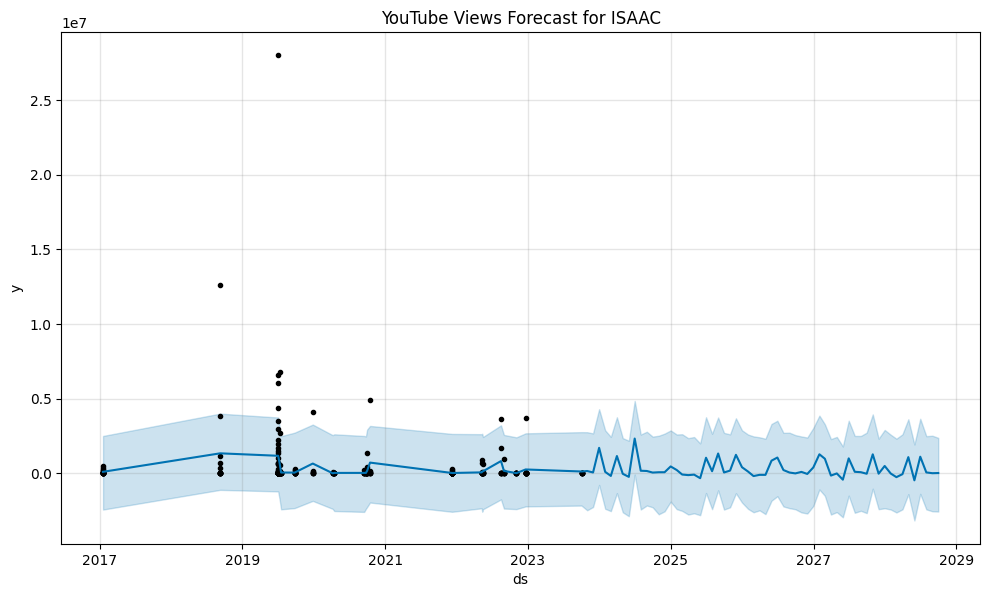

C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra

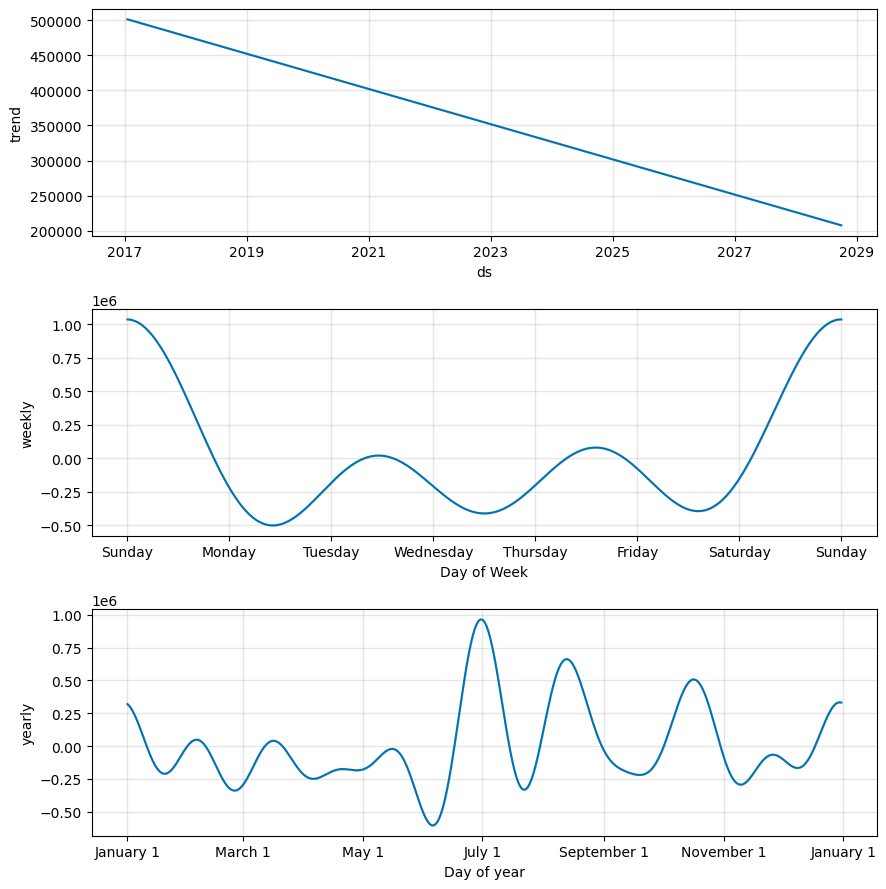

In [ ]:
from prophet import Prophet
import matplotlib.pyplot

# Prepare data for Prophet
prophet_df2 = aggregated_df2[['Published Date', 'Streams']].rename(columns={'Published Date': 'ds', 'Streams': 'y'})

# Initialize Prophet model
model2 = Prophet(yearly_seasonality=True)

# Fit the model
model2.fit(prophet_df2)

# Create future data points (for 5 more years)
future2 = model2.make_future_dataframe(periods=5 * 12, freq='M')  # 5 years of monthly predictions

# Predict the future
forecast2 = model2.predict(future2)

# Plot forecast
model2.plot(forecast2)
plt.title('YouTube Views Forecast for ISAAC')
plt.show()

# Plot forecast components (seasonality, trend, etc.)
model2.plot_components(forecast2)
plt.show()

In [47]:
# Extract YouTube forecast data
forecast_df2 = forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Save forecast data to a CSV file for reporting or further analysis
forecast_df2.to_csv('isaac_youtube_forecast_2024_2029.csv', index=False)

# Display a preview of the YouTube forecast data
print(forecast_df2.head())

          ds          yhat    yhat_lower    yhat_upper
0 2017-01-18  9.151420e+04 -2.437340e+06  2.492785e+06
1 2018-09-09  1.329280e+06 -1.118220e+06  3.988321e+06
2 2019-07-03  1.164836e+06 -1.220777e+06  3.728993e+06
3 2019-07-10  7.006241e+05 -1.724034e+06  3.128602e+06
4 2019-07-18  4.564807e+04 -2.420627e+06  2.480721e+06


## 5. Evaluate the Model

In [ ]:
from sklearn.metrics import mean_squared_error

# Split into training and testing sets
train1 = prophet_data[prophet_data['ds'] < '2022-09-09']
test1 = prophet_data[prophet_data['ds'] >= '2022-09-09']

# Initialize and fit a new Prophet model with training data
model = Prophet(yearly_seasonality=True)
model.fit(train1)

# Forecast for the test period
future_test1 = model1.make_future_dataframe(periods=len(test1), freq='M')
forecast_test1 = model1.predict(future_test1)

# Calculate RMSE
predicted_values1 = forecast_test1[['ds', 'yhat']].tail(len(test1))['yhat']
actual_values1 = test1.set_index('ds')['y']
rmse1 = mean_squared_error(actual_values1, predicted_values1, squared=False)
print(f'RMSE: {rmse1}')


20:08:23 - cmdstanpy - INFO - Chain [1] start processing
20:08:23 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 475500.0267670712
